In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint

In [ ]:
def show(X):
	if X.dim() == 3 and X.size(0) == 3:
		plt.imshow( np.transpose(  X.numpy() , (1, 2, 0))  )
		plt.show()
	elif X.dim() == 2:
		plt.imshow(   X.numpy() , cmap='gray'  )
		plt.show()
	else:
		print('WRONG TENSOR SIZE')

In [ ]:
def show_prob_mnist(p):

	p=p.data.squeeze().numpy()

	ft=15
	label = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine')
	#p=p.data.squeeze().numpy()
	y_pos = np.arange(len(p))*1.2
	target=2
	width=0.9
	col= 'blue'
	#col='darkgreen'

	plt.rcdefaults()
	fig, ax = plt.subplots()

	# the plot
	ax.barh(y_pos, p, width , align='center', color=col)

	ax.set_xlim([0, 1.3])
	#ax.set_ylim([-0.8, len(p)*1.2-1+0.8])

	# y label
	ax.set_yticks(y_pos)
	ax.set_yticklabels(label, fontsize=ft)
	ax.invert_yaxis()  
	#ax.set_xlabel('Performance')
	#ax.set_title('How fast do you want to go today?')

	# x label
	ax.set_xticklabels([])
	ax.set_xticks([])
	#x_pos=np.array([0, 0.25 , 0.5 , 0.75 , 1])
	#ax.set_xticks(x_pos)
	#ax.set_xticklabels( [0, 0.25 , 0.5 , 0.75 , 1] , fontsize=15)

	ax.spines['right'].set_visible(False)
	ax.spines['top'].set_visible(False)
	ax.spines['bottom'].set_visible(False)
	ax.spines['left'].set_linewidth(4)


	for i in range(len(p)):
	    str_nb="{0:.2f}".format(p[i])
	    ax.text( p[i] + 0.05 , y_pos[i] ,str_nb ,
	             horizontalalignment='left', verticalalignment='center',
	             transform=ax.transData, color= col,fontsize=ft)



	plt.show()
	#fig.savefig('pic/prob', dpi=96, bbox_inches="tight")

In [ ]:
import os.path
def check_mnist_dataset_exists(path_data='../../data/'):
    flag_train_data = os.path.isfile(path_data + 'mnist/train_data.pt') 
    flag_train_label = os.path.isfile(path_data + 'mnist/train_label.pt') 
    flag_test_data = os.path.isfile(path_data + 'mnist/test_data.pt') 
    flag_test_label = os.path.isfile(path_data + 'mnist/test_label.pt') 
    if flag_train_data==False or flag_train_label==False or flag_test_data==False or flag_test_label==False:
        print('MNIST dataset missing - downloading...')
        import torchvision
        import torchvision.transforms as transforms
        trainset = torchvision.datasets.MNIST(root=path_data + 'mnist/temp', train=True,
                                                download=True, transform=transforms.ToTensor())
        testset = torchvision.datasets.MNIST(root=path_data + 'mnist/temp', train=False,
                                               download=True, transform=transforms.ToTensor())
        train_data=torch.Tensor(60000,28,28)
        train_label=torch.LongTensor(60000)
        for idx , example in enumerate(trainset):
            train_data[idx]=example[0].squeeze()
            train_label[idx]=example[1]
        torch.save(train_data,path_data + 'mnist/train_data.pt')
        torch.save(train_label,path_data + 'mnist/train_label.pt')
        test_data=torch.Tensor(10000,28,28)
        test_label=torch.LongTensor(10000)
        for idx , example in enumerate(testset):
            test_data[idx]=example[0].squeeze()
            test_label[idx]=example[1]
        torch.save(test_data,path_data + 'mnist/test_data.pt')
        torch.save(test_label,path_data + 'mnist/test_label.pt')
    return path_data

Download the data and print the sizes

In [ ]:
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')

MNIST dataset missing - downloading...
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/mnist/temp/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/mnist/temp/MNIST/raw




Extracting ../../data/mnist/temp/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/mnist/temp/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/mnist/temp/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/mnist/temp/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/mnist/temp/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/mnist/temp/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Make a ONE layer net class.

In [ ]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

Build the net

In [ ]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


Choose the criterion, optimizer, batchsize, learning rate

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=50

Do 15 passes through the training set

In [ ]:
## complete here
    
    ##complete here
 
    ##complete here
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss = criterion( scores , minibatch_label) 
 
        loss.backward()

        optimizer.step()

Choose image at random from the test set and see how good/bad are the predictions

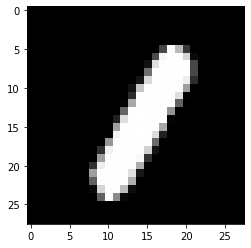

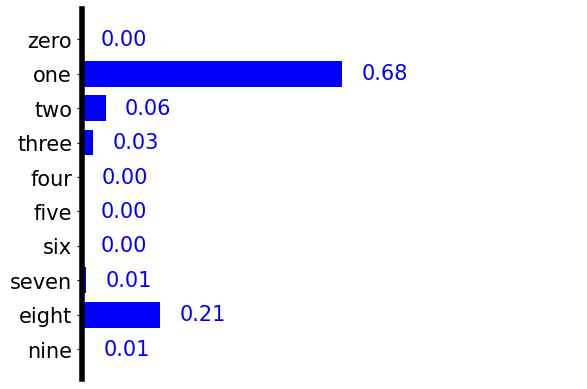

In [ ]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
show_prob_mnist(probs)